# DBSCAN Clustering
#### Created by Andres Segura
#### Created on Apr 16, 2021

## Unsupervised Learning Task
Cluster the points of the following image using the DBSCAN algorithm.

![picture](https://raw.githubusercontent.com/ansegura7/WorldHappinessReport/master/img/m272_thumb.jpg)

## 1. Read Data from Drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id': "*****"})
downloaded.GetContentFile('m272.off')

raw_data = []
with open('m272.off') as f:
  line = f.readline().replace('\n', '')

  if line == "OFF":
    line = f.readline()
    n_nodes, n_faces, n_edges = [int(v) for v in line.split(" ")]

    for i in range(n_nodes):
      line = f.readline()
      x, y, z = [float(v) for v in line.split(" ")]
      raw_data.append([x, y, z])

print('numVertices:', len(raw_data))

numVertices: 4640


## 2. Plot Data in 3D

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

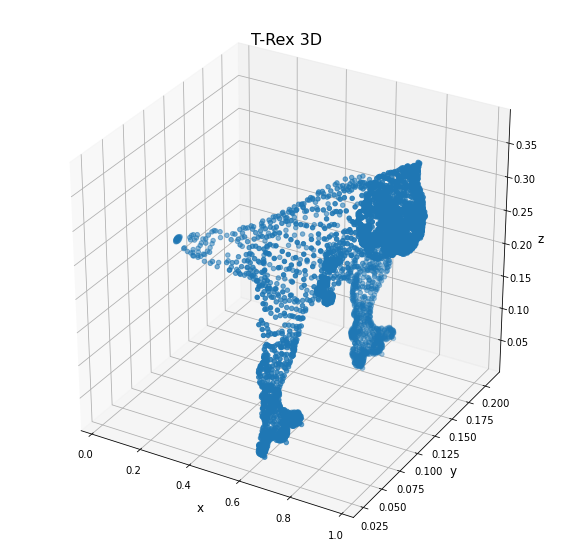

In [ ]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# Get (x, y, z) axis values
x, y, z = zip(*raw_data)

# Add annotations one by one with a loop
ax.scatter3D(z, x, y, '.')

# Plot setup
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("z", fontsize=12)
ax.set_title("T-Rex 3D", fontsize=16)
plt.show()

## 3. Clustering Points
Using Density-based spatial clustering of applications with noise (DBSCAN) algorithm.

In [ ]:
# Import ML library
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# Apply DBSCAN (without standardization)
dbscan = DBSCAN(eps=0.01, min_samples=6).fit(raw_data)
clusters = dbscan.labels_
set(clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

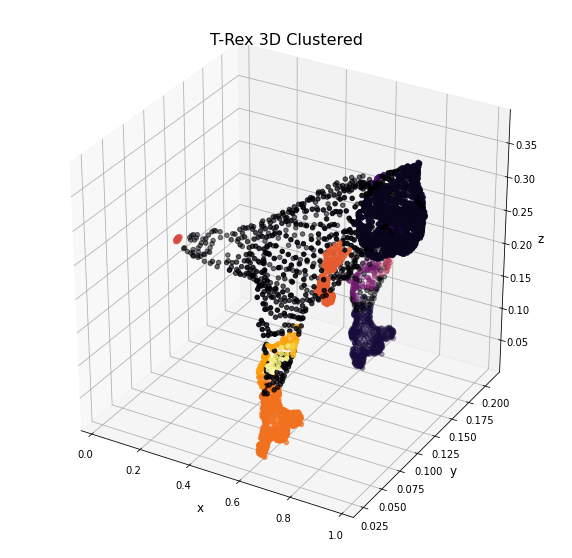

In [ ]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# Get (x, y, z) axis values
x, y, z = zip(*raw_data)

# Add annotations one by one with a loop
ax.scatter3D(z, x, y, '.', c=clusters, cmap='inferno')

# Plot setup
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("z", fontsize=12)
ax.set_title("T-Rex 3D Clustered", fontsize=16)
plt.show()